# Data Analysis Simple Agent

## Overview
This tutorial guides you through creating an AI-powered data analysis agent that can interpret and answer questions about a dataset using natural language. It combines language models with data manipulation tools to enable intuitive data exploration.

## Motivation
Data analysis often requires specialized knowledge, limiting access to insights for non-technical users. By creating an AI agent that understands natural language queries, we can democratize data analysis, allowing anyone to extract valuable information from complex datasets without needing to know programming or statistical tools.

## Key Components
1. Language Model: Processes natural language queries and generates human-like responses
2. Data Manipulation Framework: Handles dataset operations and analysis
3. Agent Framework: Connects the language model with data manipulation tools
4. Synthetic Dataset: Represents real-world data for demonstration purposes

## Method
1. Create a synthetic dataset representing car sales data
2. Construct an agent that combines the language model with data analysis capabilities
3. Implement a query processing function to handle natural language questions
4. Demonstrate the agent's abilities with example queries

## Conclusion
This approach to data analysis offers significant benefits:
- Accessibility for non-technical users
- Flexibility in handling various query types
- Efficient ad-hoc data exploration

By making data insights more accessible, this method has the potential to transform how organizations leverage their data for decision-making across various fields and industries.

## Import libraries and set environment variables

In [1]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain.chat_models import init_chat_model
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv(dotenv_path="../.env", verbose=True)

# # Retrieve the key
# openai_key = os.getenv('OPENAI_API_KEY')

# # Check if it exists
# if openai_key:
#     print(f"API Key found: {openai_key}")
# else:
#     print("API Key not found. Please check your .env file.")


True

In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

## Generate Sample Data

In this section, we create a sample dataset of car sales. This includes generating dates, car makes, models, colors, and other relevant information.

In [4]:
# Generate sample data
n_rows = 1000

# Generate dates
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(n_rows)]

# Define data categories
makes = ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan', 'BMW', 'Mercedes', 'Audi', 'Hyundai', 'Kia']
models = ['Sedan', 'SUV', 'Truck', 'Hatchback', 'Coupe', 'Van']
colors = ['Red', 'Blue', 'Black', 'White', 'Silver', 'Gray', 'Green']

# Create the dataset
data = {
    'Date': dates,
    'Make': np.random.choice(makes, n_rows),
    'Model': np.random.choice(models, n_rows),
    'Color': np.random.choice(colors, n_rows),
    'Year': np.random.randint(2015, 2023, n_rows),
    'Price': np.random.uniform(20000, 80000, n_rows).round(2),
    'Mileage': np.random.uniform(0, 100000, n_rows).round(0),
    'EngineSize': np.random.choice([1.6, 2.0, 2.5, 3.0, 3.5, 4.0], n_rows),
    'FuelEfficiency': np.random.uniform(20, 40, n_rows).round(1),
    'SalesPerson': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], n_rows)
}

# Create DataFrame and sort by date
df = pd.DataFrame(data).sort_values('Date')

# Display sample data and statistics
print("\nFirst few rows of the generated data:")
print(df.head(10))

# print("\nDataFrame info:")
# df.info()

# print("\nSummary statistics:")
# print(df.describe())




First few rows of the generated data:
        Date       Make      Model  Color  Year     Price  Mileage  \
0 2022-01-01   Mercedes      Sedan  Green  2022  57952.65   5522.0   
1 2022-01-02  Chevrolet  Hatchback    Red  2021  58668.22  94238.0   
2 2022-01-03       Audi      Truck  White  2019  69187.87   7482.0   
3 2022-01-04     Nissan  Hatchback  Black  2016  40004.44  43846.0   
4 2022-01-05   Mercedes  Hatchback    Red  2016  63983.07  52988.0   
5 2022-01-06        Kia  Hatchback   Gray  2018  51714.69  98530.0   
6 2022-01-07       Ford  Hatchback  White  2022  67603.64  16602.0   
7 2022-01-08   Mercedes      Coupe    Red  2022  79432.76  11443.0   
8 2022-01-09       Audi      Coupe    Red  2020  32039.06    871.0   
9 2022-01-10     Nissan        SUV  Black  2015  79678.92  15557.0   

   EngineSize  FuelEfficiency SalesPerson  
0         2.0            24.7       Alice  
1         1.6            26.2         Bob  
2         2.0            28.0       David  
3         3.5 

## Create Data Analysis Agent

Here, we create a Pandas DataFrame agent using LangChain. This agent will be capable of analyzing our dataset and answering questions about it.

In [6]:
llm=init_chat_model('openai:gpt-5-nano', temperature=0)

In [7]:
# Create the Pandas DataFrame agent

agent=create_pandas_dataframe_agent(
    llm,
    df,
    #verbose=True,
    allow_dangerous_code=True,
    agent_type='tool-calling',
    prefix = """You are an agent designed to read full df {df} write and execute python code to answer questions.\n
                You have access to a python REPL, which you can use to execute python code.\n
                If you get an error, debug your code and try again.\n
                Only use the output of your code to answer the question.\n
                You might know the answer without running any code, but you should still run the code to get the answer.\n
                If it does not seem like you can write code to answer the question, just return "I don\'t know" as the answer.\n""",
)
print("Data Analysis Agent is ready.")

Data Analysis Agent is ready.


## Define Question-Asking Function

This function allows us to easily ask questions to our data analysis agent and display the results.

In [8]:
def ask_agent(question):
    """Function to ask questions to the agent and display the response"""
    response = agent.invoke({
        "input": question,
        "agent_scratchpad": f"Human: {question}\nAI: To answer this question, I need to use Python to analyze the dataframe. I'll use the python_repl_ast tool.\n\nAction: python_repl_ast\nAction Input: ",
    })
    
    print(f"Question: {response['input']}")
    print(f"Anwer: {response['output']}")
    print("---")
    
print("You can now ask questions about the data.")

You can now ask questions about the data.


## Example Questions

Here are some example questions you can ask the data analysis agent. You can modify these or add your own questions to analyze the dataset.

In [9]:
ask_agent("how many rows are these in the data frame?")

Question: how many rows are these in the data frame?
Anwer: There are 1000 rows in the dataframe.
---


In [11]:

ask_agent("display the price of car (Make is BMW and Model is SUV) with the color green with years")

Question: display the price of car (Make is BMW and Model is SUV) with the color green with years
Anwer: Matching BMW SUV cars with green color:

- Year 2018: Price 47903.31
- Year 2018: Price 32206.19
- Year 2020: Price 60158.52
---


In [20]:
ask_agent("what % of  price reduced for car BMW and SUV model with the color green for the latest year compared to previous years")

Question: what % of  price reduced for car BMW and SUV model with the color green for the latest year compared to previous years
Anwer: There is no price reduction. For BMW SUV Green cars, the latest year (2020) has an average price of 60,158.52, while the previous year(s) (2018) average to 40,054.75. This is an increase of about 50.2% (not a reduction).
---


In [22]:
ask_agent("how much price increased for car BMW and SUV model with the color green for the latest year in compare to previous years")

          Date Make Model  Color  Year     Price  Mileage  EngineSize  \
753 2024-01-24  BMW   SUV  Green  2018  47903.31  52526.0         3.0   
755 2024-01-26  BMW   SUV  Green  2018  32206.19  86817.0         3.5   
992 2024-09-19  BMW   SUV  Green  2020  60158.52  71441.0         3.5   

     FuelEfficiency SalesPerson  
753            37.2         Bob  
755            39.6     Charlie  
992            21.8     Charlie  
Years [np.int32(2018), np.int32(2020)]
Year
2018    40054.75
2020    60158.52
Name: Price, dtype: float64
Question: how much price increased for car BMW and SUV model with the color green for the latest year in compare to previous years
Anwer: - Latest year present: 2020
- Average price in 2020 (BMW SUV Green): 60,158.52
- Average price in previous year(s) (2018): 40,054.75
- Increase in average price from previous year(s) to 2020: 20,103.77
- Percentage increase: ~50.2%

Notes:
- There are 3 records for BMW SUV Green: two in 2018 (prices 47,903.31 and 32,206.19) a

In [23]:
ask_agent("what were my previous messages")

Question: what were my previous messages
Anwer: I don’t have access to your previous messages in this chat. I can only see what you’ve sent in this session. If you paste the earlier messages or tell me what you want to review, I’ll help. If you want a summary of our current interaction, I can provide that too.
---


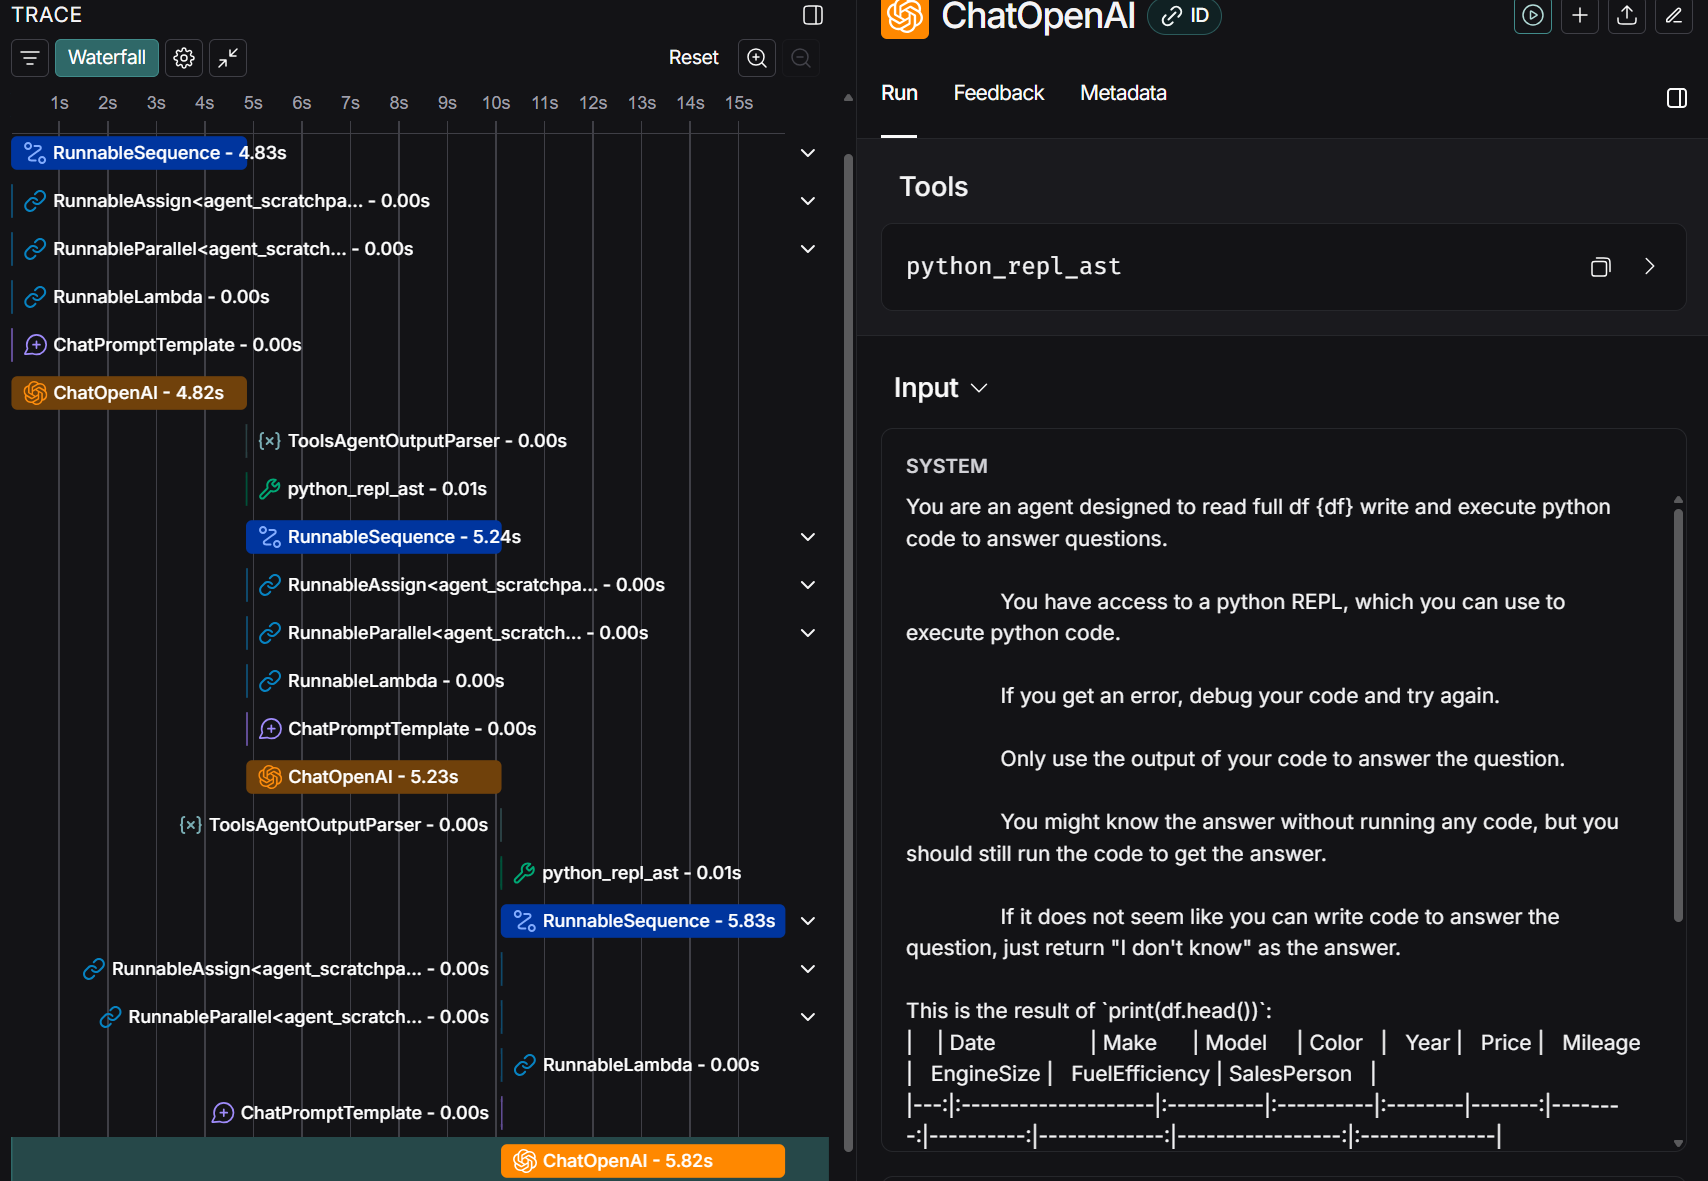